<a href="https://colab.research.google.com/github/yuseifer/Practicas_Colab/blob/main/Copia_de_Cacao_detectron2_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Requerimientos previos (EJECUTAR)

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 6.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15681, done.
remote: Counting objects: 100% (404/404), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 15681 (delta 180), reused 268 (delta 94), pack-reused 15277
Receiving objects: 100% (15681/15681), 6.51 MiB | 26.33 MiB/s, done.
Resolving deltas: 100% (11295/11295), done.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=55a62f002879a937132aee0b7ff75f8cf5efbc2d1256ee9e6bf01e1aafe1ef50
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=68d15a5fe412cf5260f1cec7a8baa93c3707925a7a1dbe0717c73cf0a576eef5
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a

#No correr

In [ ]:
#!sudo apt-get install python3.7
#!sudo apt-get install gcc-12 g++-12
#!pip install torch==2.1.0
#!pip install torchvision==0.15.1
#!pip install opencv-python==4.6.0.66
#!virtualenv venv -p python3.7
#!source venv/bin/activate
#!pip3 install torch torchvision
#!pip3 install opencv-python
#!pip3 install 'git+https://github.com/facebookresearch/fvcore'
#!pip3 install cython; pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
#!pip install matplotlib==3.6
#!pip install git+https://github.com/facebookresearch/detectron2.git



#Importación de librerías para cargar dataset

In [ ]:
import os
import shutil
import zipfile as zp

#Creación de carpetas

In [ ]:
path=['res','dataset']
ruta=os.path.join(*path)
if not os.path.exists(ruta):
  os.makedirs(ruta)


#Importación del zip

In [ ]:
#ruta_archivo ='/content/drive/MyDrive/Colab Notebooks/Enfermedades Cacao/Enfermedades Cacao.zip'
ruta_archivo ='/content/drive/MyDrive/Detect_cacao/archive.zip'
dir=ruta.replace('.zip','')

with  zp.ZipFile(ruta_archivo,'r') as zipp:
  zipp.extractall(dir)


#Librerías a usar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

#Visualización de imagenes

El formato de las bounding boxes es: clase,centrox,centroy,ancho,alto

Las clases disponibles son:['Fitoftora', 'Monilia', 'Sana']
El ancho es de 3120 y el alto de 4160
En la imagen hay 0 imagenes de Fitoftora
En la imagen hay 1 imagenes de Monilia
En la imagen hay 5 imagenes de Sana


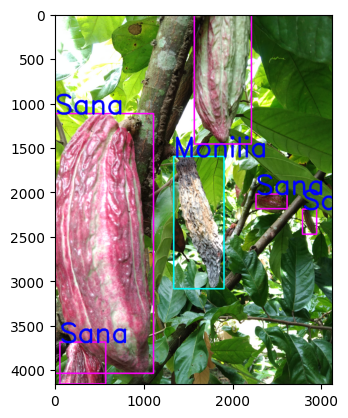

In [ ]:

path='/content/res/dataset/Enfermedades Cacao/Monilia'
path_image='/content/res/dataset/Enfermedades Cacao/Monilia/Monilia5.jpg'
path_bbox='/content/res/dataset/Enfermedades Cacao/Monilia/Monilia5.txt'
clases=[]
bboxes=[]
cls=[]
paleta_colores=[(255,0,0),(255,255,0),(255,0,255)]#Primero para fito, segundo para Monilia y el tercero para Sana
with open(os.path.join(path,'classes.txt'),'r') as t: #Abrimos un archivo en el que se nos indican las clases
  for rows in t:
    cl=rows.replace('\n','')
    clases.append(cl)
print(f'Las clases disponibles son:{clases}')
identifiers=dict(zip(range(len(clases)),clases))
img=cv2.imread(path_image)
h,w,_=img.shape
print(f'El ancho es de {w} y el alto de {h}')
with open(path_bbox,'r') as t:
  for rows in t:
    linea=np.array(rows.strip('\n').split(" "),dtype=float)
    cla,x0,y0,w0,h0=linea
    x=(x0-w0/2)*w
    y=(y0-h0/2)*h
    W=w0*w
    H=h0*h
    cv2.rectangle(img,(int(x),int(y)),(int(x+W),int(y+H)),paleta_colores[int(cla)],15)
    cv2.putText(img,identifiers[cla],(int(x), int(y)) ,cv2.FONT_HERSHEY_SIMPLEX ,10,(255,0,0),25,cv2.LINE_AA)
    #cv2.circle(img,(int(x0*w),int(y0*h)),100,(0,255,0),-1)
    cls.append(linea[0])
    bboxes.append(linea[1:])

print(f'En la imagen hay {cls.count(0)} imagenes de {clases[0]}')
print(f'En la imagen hay {cls.count(1)} imagenes de {clases[1]}')
print(f'En la imagen hay {cls.count(2)} imagenes de {clases[2]}')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()




#Separación del dataset en training,validation y testing
Para esto creamos una función que nos permita separar la información a gusto del que use el código

In [ ]:
#Creamos una sola carpeta con todos los datos de entrenamiento y de testing
for r in ['train','val','test']:
  ruta=os.path.join('res/data',r)
  os.makedirs(ruta,exist_ok=True)
  for r2 in ['imgs','anns']:              #Cada carpeta debe tener a su vez una carpeta de imagenes y anotaciones
    ruta_2=os.path.join(ruta,r2)
    os.makedirs(ruta_2,exist_ok=True)
#Definimos cuantos archivos queremos para train,val y test
ratio_train=0.7
#ratio_val=0.2
path_d='/content/res/dataset/Enfermedades Cacao'
for carpetas in os.listdir(path_d):
  ruta_provisional_carpeta=os.path.join(path_d,carpetas)
  archivos_disponibles=(len(os.listdir(ruta_provisional_carpeta))-1)/2
  a_train=int(archivos_disponibles*ratio_train)
  a_val=int(archivos_disponibles*0.85)
  print(f'La carpeta {carpetas} tiene {archivos_disponibles} archivos disponibles')
  conteo=0
  for idx,archivo in enumerate(os.listdir(ruta_provisional_carpeta)):
    nombre_archivo=os.path.join(ruta_provisional_carpeta,archivo)
    if nombre_archivo.endswith('txt'):
      continue
    else:
      anotaciones=nombre_archivo.replace('.jpg','.txt')
      if conteo <= a_train:
                dst_path_img = os.path.join('/content/res/data/train/imgs', archivo)
                dst_path_txt = os.path.join('/content/res/data/train/anns', archivo.replace('.jpg','.txt'))
      else:
        if conteo <= a_val:
                dst_path_img = os.path.join('/content/res/data/val/imgs', archivo)
                dst_path_txt = os.path.join('/content/res/data/val/anns', archivo.replace('.jpg','.txt'))
        else:
          dst_path_img = os.path.join('/content/res/data/test/imgs', archivo)
          dst_path_txt = os.path.join('/content/res/data/test/anns', archivo.replace('.jpg','.txt'))

      shutil.copy(nombre_archivo, dst_path_img)
      shutil.copy(anotaciones, dst_path_txt)
      conteo+=1

clases=['Fitoftora','Fitoftora','Sana']

print('Separación exitosa')




La carpeta Sana tiene 100.0 archivos disponibles
La carpeta Fito tiene 107.0 archivos disponibles
La carpeta Monilia tiene 105.0 archivos disponibles
Separación exitosa


#Creación de los directorios y carga de archivos al modelo

In [ ]:

from detectron2.engine import DefaultTrainer                  #Ejecuta el modelo
from detectron2.data import MetadataCatalog, DatasetCatalog   #Administra los datos al modelo
from detectron2.structures import BoxMode                     #Da
from detectron2.config import get_cfg as _get_cfg             #Guarda y obtiene las configuraciones del modelo
from detectron2 import model_zoo                              #Modelo a usar
from detectron2.engine import DefaultPredictor
#from detectron2.data import register_datasets
#from detectron2.evaluation.hooks import ValidationLoss

#Creación del algoritmo usando detectron

Definimos parámetros para trabajar con el modelo

In [ ]:
c='/content/res/dataset/Enfermedades Cacao/Sana/classes.txt'     #Archivo con las clases
d='/content/res/data/classes.txt'
shutil.copy(c, d)
os.rename(d,'/content/res/data/class.names')


In [ ]:
output_dir='/content/drive/MyDrive/f_cacao' #Donde se guardará el modelo
learning_rate=0.00001
batch_size=4
iterations=6000
checkpoint_period=500
model='COCO-Detection/retinanet_R_101_FPN_3x.yaml'
device='gpu'
class_list_file='/content/res/data/class.names'
data_dir='/content/res/data'



#Configuración del modelo

In [ ]:
cfg=_get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.VAL = ("val",)
cfg.DATASETS.TEST = ("test",)

# Set the device to use for training.
if device in ['cpu']:
  cfg.MODEL.DEVICE = 'cpu'

# Set the number of data loader workers.
cfg.DATALOADER.NUM_WORKERS = 2

# Set the model weights to the ones pre-trained on the COCO dataset.
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model)

# Set the batch size used by the solver.
cfg.SOLVER.IMS_PER_BATCH = batch_size

# Set the checkpoint period.
cfg.SOLVER.CHECKPOINT_PERIOD = checkpoint_period

# Set the base learning rate.
cfg.SOLVER.BASE_LR = learning_rate

# Set the maximum number of training iterations.
cfg.SOLVER.MAX_ITER = iterations

# Set the learning rate scheduler steps to an empty list, which means the learning rate will not be decayed.
cfg.SOLVER.STEPS = []

# Set the batch size used by the ROI heads during training.
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

# Set the output directory.
cfg.OUTPUT_DIR = output_dir

#Entrenamiento de la red (No correr)

In [ ]:
#No correr
!pip install torchvision==0.15.1
!pip install torch==2.1.0
!pip install opencv-python==4.6.0.66

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 50.7 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in 
exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in 
wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", 
line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in 
resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 427, in 
resolve
    fai

In [ ]:
#No correr
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .
import mmdet
print(mmdet.__version__)
# Example output: 3.0.0, or an another version.

#Entrenar

In [ ]:
nmr_classes = register_datasets(data_dir,class_list_file)

# Indicamos el numero de clases.
cfg.MODEL.ROI_HEADS.NUM_CLASSES = nmr_classes
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3
os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)

#Creamos el objeto entrenador
trainer = DefaultTrainer(cfg)
#Creamos un objeto para obtener la precisión en los datos de validacion
val_loss=ValidationLoss(cfg)
# Register the custom validation loss object as a hook to the trainer
trainer.register_hooks([val_loss])

# Swap the positions of the evaluation and checkpointing hooks so that the validation loss is logged correctly
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]

# Resume training from a checkpoint or load the initial model weights
trainer.resume_or_load(resume=False)

# Train the model
trainer.train()




[04/03 12:47:09 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/03 12:49:12 d2.utils.events]:  eta: 1:31:50  iter: 2019  total_loss: 0.5826  loss_cls: 0.2986  loss_box_reg: 0.3126  total_val_loss: 0.5588  val_loss_cls: 0.3168  val_loss_box_reg: 0.2566    time: 1.3609  last_time: 1.2051  data_time: 0.1011  last_data_time: 0.0183   lr: 1e-05  max_mem: 7251M
[04/03 12:49:53 d2.utils.events]:  eta: 1:31:22  iter: 2039  total_loss: 0.3972  loss_cls: 0.2388  loss_box_reg: 0.1755  total_val_loss: 0.5771  val_loss_cls: 0.3165  val_loss_box_reg: 0.2455    time: 1.3397  last_time: 1.4716  data_time: 0.0190  last_data_time: 0.0265   lr: 1e-05  max_mem: 7251M
[04/03 12:50:33 d2.utils.events]:  eta: 1:30:39  iter: 2059  total_loss: 0.473  loss_cls: 0.2332  loss_box_reg: 0.2251  total_val_loss: 0.5502  val_loss_cls: 0.2723  val_loss_box_reg: 0.2715    time: 1.3558  last_time: 1.2862  data_time: 0.0423  last_data_time: 0.0169   lr: 1e-05  max_mem: 7251M
[04/03 12:51:11 d2.utils.events]:  eta: 1:29:47  iter: 2079  total_loss: 0.4431  loss_cls: 0.2391  loss_box

#Gráficas

Mostrando gráficas
Las metricas a valorar son: 
Accuracy
Loss


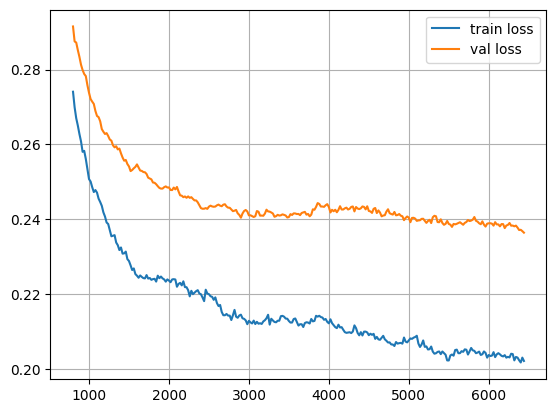

Debemos quedarnos con la iteración del modelo que mejor resultados presente


In [ ]:
import ast
import json
#comentario para que no se desconecte la sesion
print("Mostrando gráficas")
print("Las metricas a valorar son: ")
print("Accuracy")
print("Loss")


import matplotlib.pyplot as plt
import numpy as np

#Creamos una funcion para quitar el ruido del entrenamiento

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = '/content/drive/MyDrive/f_cacao/metrics.json'                                     #Archivo generado al entrenar

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['loss_box_reg']) for v in metrics if 'loss_box_reg' in v.keys()]
val_loss = [float(v['val_loss_box_reg']) for v in metrics if 'val_loss_box_reg' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='val loss')
plt.legend()
plt.grid()
plt.show()
print("Debemos quedarnos con la iteración del modelo que mejor resultados presente")

#Predicción


[12/18 16:50:01 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Colab Notebooks/Detect_cacao/model_final.pth ...


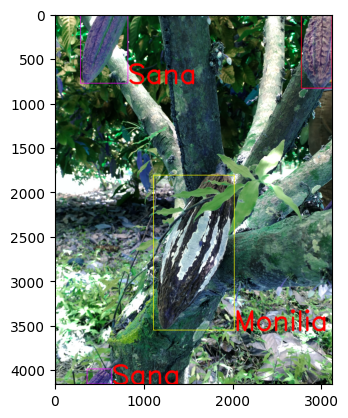

In [ ]:
# Load config from a config file
cfg_p = _get_cfg()
cfg_p.merge_from_file(model_zoo.get_config_file('COCO-Detection/retinanet_R_101_FPN_3x.yaml'))
cfg_p.MODEL.WEIGHTS = '/content/drive/MyDrive/Colab Notebooks/Detect_cacao/model_final.pth'                   #Archivo generado al entrenar
cfg_p.MODEL.DEVICE = 'cpu'

# Create predictor instance
predictor = DefaultPredictor(cfg_p)

# Load image
image = cv2.imread("/content/res/dataset/Monilia/Monilia1.jpg")            #imagen sacada del dataset

# Perform prediction
outputs = predictor(image)

threshold = 0.5

# Display predictions
preds = outputs["instances"].pred_classes.tolist()
scores = outputs["instances"].scores.tolist()
bboxes = outputs["instances"].pred_boxes


for j, bbox in enumerate(bboxes):
    bbox = bbox.tolist()

    score = scores[j]
    pred = preds[j]

    if score > threshold:
        x1, y1, x2, y2 = [int(i) for i in bbox]
        if pred == 0:
          color=(255,0,0)
          clase='Fitoftora'
        elif pred == 1:
          color=(255,255,0)
          clase='Monilia'
        elif pred == 2:
          color=(255,0,255)
          clase='Sana'
        else:
          color=(0,255,0)
          clase='Otro'

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 5)
        cv2.putText(image,clase,(x2,y2) ,cv2.FONT_HERSHEY_SIMPLEX ,10,(255,0,0),25,cv2.LINE_AA)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print("Color rosado para sana")
print("Color azul para Fito")
print("Color Cian para Monilia")
#cv2.imshow('image', image)
#cv2.waitKey(0)

#Predicción de una imagen diferente al dataset

Color rosado para sana
Color azul para Fito
Color Cian para Monilia


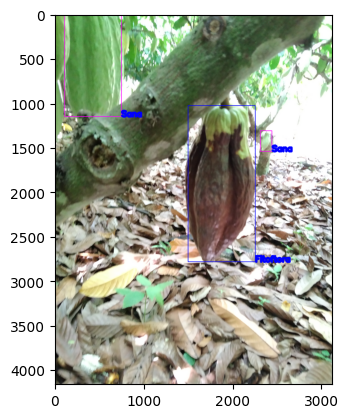

In [ ]:
# Load image
#image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/dataset_monilia/Monilia/Monilia139.jpg")            #imagen sacada del dataset
#image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/dataset_monilia/Fito/Fito10.jpg")            #imagen sacada del dataset
image = cv2.imread("/content/res/data/test/imgs/Fito101.jpg")            #imagen sacada del dataset


# Perform prediction
outputs = predictor(image)

threshold = 0.5

# Display predictions
preds = outputs["instances"].pred_classes.tolist()
scores = outputs["instances"].scores.tolist()
bboxes = outputs["instances"].pred_boxes


for j, bbox in enumerate(bboxes):
    bbox = bbox.tolist()

    score = scores[j]
    pred = preds[j]

    if score > threshold:
        x1, y1, x2, y2 = [int(i) for i in bbox]
        if pred == 0:
          color=(255,0,0)
          clase='Fitoftora'
        elif pred == 1:
          color=(255,255,0)
          clase='Monilia'
        elif pred == 2:
          color=(255,0,255)
          clase='Sana'
        else:
          color=(0,255,0)
          clase='Otro'

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 5)
        cv2.putText(image,clase,(x2,y2) ,cv2.FONT_HERSHEY_SIMPLEX ,3,(255,0,0),25,cv2.LINE_AA)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print("Color rosado para sana")
print("Color azul para Fito")
print("Color Cian para Monilia")

#Prueba

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

cfg_p = _get_cfg()
cfg_p.merge_from_file(model_zoo.get_config_file('COCO-Detection/retinanet_R_101_FPN_3x.yaml'))
cfg_p.MODEL.WEIGHTS = '/content/model_final.pth'                   #Archivo generado al entrenar
cfg_p.MODEL.DEVICE = 'cpu'

# Create predictor instance
predictor = DefaultPredictor(cfg_p)

evaluator = COCOEvaluator(f"test", cfg_p, False, output_dir=output_dir)

val_loader = build_detection_test_loader(cfg_p, f"test")
print(inference_on_dataset(predictor, val_loader, evaluator))


RuntimeError: PytorchStreamReader failed reading zip archive: failed finding central directory

#Métricas del modelo


Mostrando gráficas
Las metricas a valorar son: 
Accuracy
Loss


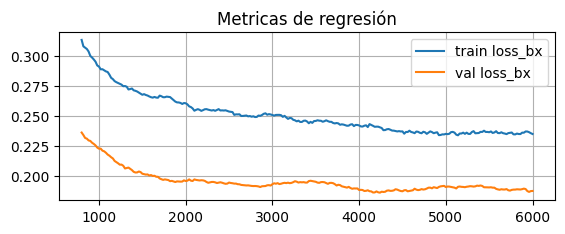

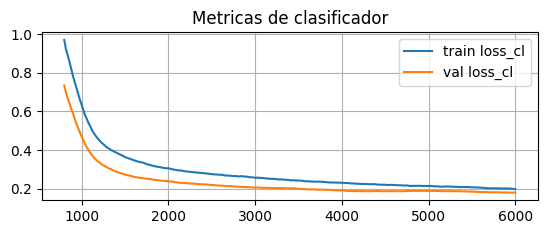

In [ ]:
import ast
import json
#comentario para que no se desconecte la sesion
print("Mostrando gráficas")
print("Las metricas a valorar son: ")
print("Accuracy")
print("Loss")


import matplotlib.pyplot as plt
import numpy as np

#Creamos una funcion para quitar el ruido del entrenamiento

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = '/content/metrics.json'                                     #Archivo generado al entrenar

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

#Obtenemos las metricas de validacion del regresor
train_loss_bx = [float(v['loss_box_reg']) for v in metrics if 'loss_box_reg' in v.keys()]
val_loss_bx = [float(v['val_loss_box_reg']) for v in metrics if 'val_loss_box_reg' in v.keys()]

N = 40

train_loss_avg_bx = moving_average(train_loss_bx, n=N)
val_loss_avg_bx = moving_average(val_loss_bx, n=N)

#Obtenemos las metricas de validacion del clasificador
train_loss_cl = [float(v['loss_cls']) for v in metrics if 'loss_cls' in v.keys()]
val_loss_cl = [float(v['val_loss_cls']) for v in metrics if 'val_loss_cls' in v.keys()]


train_loss_avg_cl = moving_average(train_loss_cl, n=N)
val_loss_avg_cl = moving_average(val_loss_cl, n=N)

#Graficamos
plt.subplot(2,1,1)
plt.plot(range(20 * N - 1, 20 * len(train_loss_bx), 20), train_loss_avg_bx, label='train loss_bx')
plt.plot(range(20 * N - 1, 20 * len(train_loss_bx), 20), val_loss_avg_bx, label='val loss_bx')
plt.title("Metricas de regresión")
plt.legend()
plt.grid()
plt.show()
plt.subplot(2,1,2)
plt.title("Metricas de clasificador")
plt.plot(range(20 * N - 1, 20 * len(train_loss_cl), 20), train_loss_avg_cl, label='train loss_cl')
plt.plot(range(20 * N - 1, 20 * len(train_loss_cl), 20), val_loss_avg_cl, label='val loss_cl')
plt.legend()
plt.grid()
plt.show()


In [ ]:
metrics[0]

{'data_time': 0.021461898999973528,
 'eta_seconds': 2979.3406051498528,
 'iteration': 19,
 'loss_box_reg': 0.4758630394935608,
 'loss_cls': 2.409234404563904,
 'lr': 1.9981000000000001e-07,
 'num_pos_anchors': 96.625,
 'rank_data_time': 0.021461898999973528,
 'time': 0.4982174924999754,
 'total_loss': 2.8850974440574646,
 'total_val_loss': 2.2411550879478455,
 'val_loss_box_reg': 0.3144221901893616,
 'val_loss_cls': 1.8171377778053284}

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader


cfg_p = _get_cfg()
cfg_p.merge_from_file(model_zoo.get_config_file('COCO-Detection/retinanet_R_101_FPN_3x.yaml'))
cfg_p.MODEL.WEIGHTS = '/content/model_final.pth'                   #Archivo generado al entrenar
cfg_p.MODEL.DEVICE = 'cpu'
predictor = DefaultPredictor(cfg_p)

class_list_file='/content/res/data/class.names'
data_dir='/content/res/data'

#nmr_classes = register_datasets(data_dir,class_list_file)
evaluator = COCOEvaluator("test", ("bbox", "segm"), False, output_dir="/content/res")
test_loader = build_detection_test_loader(cfg_p, "test")






In [ ]:
print(type(test_loader))

# Print the first element of the data loader
print(next(iter(test_loader)).shape)

# Print the length of the data loader
print(len(test_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_loader)

inference_on_dataset(predictor, test_loader, evaluator)

print("Accuracy:", evaluator.cocoEval.stats["bbox"]["AP"])

TypeError: 'DataLoader' object is not subscriptable

In [ ]:
DatasetCatalog.get("coco_2014_val")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/coco/annotations/instances_val2014.json'

In [ ]:
#Función para generar metricas de test
from sklearn.metrics                                import classification_report
from sklearn.preprocessing                          import MultiLabelBinarizer

"""cfg_p = _get_cfg()
cfg_p.merge_from_file(model_zoo.get_config_file('COCO-Detection/retinanet_R_101_FPN_3x.yaml'))
cfg_p.MODEL.WEIGHTS = '/content/model_final.pth'                   #Archivo generado al entrenar
cfg_p.MODEL.DEVICE = 'cpu'

# Create predictor instance
predictor = DefaultPredictor(cfg_p)"""

def obt_predicciones(predictor,dirimg):
  class_preds = [0,0,0]
  img = cv2.imread(dirimg)
  outputs = predictor(img)
  threshold = 0.5

  # Display predictions
  preds = outputs["instances"].pred_classes.tolist()
  scores = outputs["instances"].scores.tolist()
  bboxes = outputs["instances"].pred_boxes


  for j, bbox in enumerate(bboxes):
      bbox = bbox.tolist()
      score = scores[j]
      pred = preds[j]

      #Agregamos al vector de conteo de predicciones
      if score > threshold:
          x1, y1, x2, y2 = [int(i) for i in bbox]
          if pred == 0:
            class_preds[0]+=1
          elif pred == 1:
            class_preds[1]+=1
          elif pred == 2:
            class_preds[2]+=1

  return class_preds


def met_test(predictor,dir):
  y_classes=[]
  y_bboxes=[]
  y_pred_clases=[]
  y__pred_bbox = []
  dir_img = os.path.join(dir,"imgs")
  dir_ann = os.path.join(dir,"anns")
  for img in os.listdir(dir_img):
    ann = os.path.join(dir_ann, img.replace('.jpg','.txt'))
    image = os.path.join(dir_img, img)
    conteos=[0,0,0]
    y_pred_clases.append(obt_predicciones(predictor,image))
    with open(ann) as f:
      for linea in f:
        indice=int(linea[0])
        conteos[indice]+=1
      y_classes.append(conteos)

  m = MultiLabelBinarizer().fit(y_classes)
  print(classification_report(m.transform(y_classes), m.transform(y_pred_clases)))

met_test(predictor,'/content/res/data/test')
#obt_predicciones(predictor,'/content/res/data/test/imgs/Fito101.jpg')

ValueError: Found input variables with inconsistent numbers of samples: [220, 45]

In [ ]:
from sklearn.metrics                                import classification_report
from tensorflow.keras.preprocessing.image           import ImageDataGenerator


#Carga del modelo
cfg_p = _get_cfg()
cfg_p.merge_from_file(model_zoo.get_config_file('COCO-Detection/retinanet_R_101_FPN_3x.yaml'))
cfg_p.MODEL.WEIGHTS = '/content/model_final.pth'                   #Archivo generado al entrenar
cfg_p.MODEL.DEVICE = 'cpu'

#Cargamos la configuracion del modelo

predictor = DefaultPredictor(cfg_p)

#Obtención de los datos

print("[INFO]: Evaluando red neuronal...")



#Generación de las predicciones
outputs = predictor(image)

threshold = 0.5

# Display predictions
preds = outputs["instances"].pred_classes.tolist()
scores = outputs["instances"].scores.tolist()
bboxes = outputs["instances"].pred_boxes


for j, bbox in enumerate(bboxes):
    bbox = bbox.tolist()

    score = scores[j]
    pred = preds[j]

    if score > threshold:
        x1, y1, x2, y2 = [int(i) for i in bbox]
        if pred == 0:
          color=(255,0,0)
          clase='Fitoftora'
        elif pred == 1:
          color=(255,255,0)
          clase='Monilia'
        elif pred == 2:
          color=(255,0,255)
          clase='Sana'
        else:
          color=(0,255,0)
          clase='Otro'

        cv2.rectangle(image, (x1, y1), (x2, y2), color, 5)
        cv2.putText(image,clase,(x2,y2) ,cv2.FONT_HERSHEY_SIMPLEX ,10,(255,0,0),25,cv2.LINE_AA)

print(classification_report(test_set.classes, predictions.argmax(axis=1)))



#Definición de clases y funciones

Funcion de perdidas

In [ ]:
from detectron2.engine import HookBase
from detectron2.data import build_detection_train_loader
import detectron2.utils.comm as comm
import torch


class ValidationLoss(HookBase):
    """
    A hook that computes validation loss during training.

    Attributes:
        cfg (CfgNode): The detectron2 config node.
        _loader (iterator): An iterator over the validation dataset.
    """

    def __init__(self, cfg):
        """
        Args:
            cfg (CfgNode): The detectron2 config node.
        """
        super().__init__()
        self.cfg = cfg.clone()
        # Switch to the validation dataset
        self.cfg.DATASETS.TRAIN = cfg.DATASETS.VAL
        # Build the validation data loader iterator
        self._loader = iter(build_detection_train_loader(self.cfg))

    def after_step(self):
        """
        Computes the validation loss after each training step.
        """
        # Get the next batch of data from the validation data loader
        data = next(self._loader)
        with torch.no_grad():
            # Compute the validation loss on the current batch of data
            loss_dict = self.trainer.model(data)

            # Check for invalid losses
            losses = sum(loss_dict.values())
            assert torch.isfinite(losses).all(), loss_dict

            # Reduce the loss across all workers
            loss_dict_reduced = {"val_" + k: v.item() for k, v in
                                 comm.reduce_dict(loss_dict).items()}
            losses_reduced = sum(loss for loss in loss_dict_reduced.values())

            # Save the validation loss in the trainer storage
            if comm.is_main_process():
                self.trainer.storage.put_scalars(total_val_loss=losses_reduced,
                                                 **loss_dict_reduced)

Función para crear directorios

In [ ]:
def get_dicts(img_dir, ann_dir):
    """
    Read the annotations for the dataset in YOLO format and create a list of dictionaries containing information for each
    image.

    Args:
        img_dir (str): Directory containing the images.
        ann_dir (str): Directory containing the annotations.

    Returns:
        list[dict]: A list of dictionaries containing information for each image. Each dictionary has the following keys:
            - file_name: The path to the image file.
            - image_id: The unique identifier for the image.
            - height: The height of the image in pixels.
            - width: The width of the image in pixels.
            - annotations: A list of dictionaries, one for each object in the image, containing the following keys:
                - bbox: A list of four integers [x0, y0, w, h] representing the bounding box of the object in the image,
                        where (x0, y0) is the top-left corner and (w, h) are the width and height of the bounding box,
                        respectively.
                - bbox_mode: A constant from the `BoxMode` class indicating the format of the bounding box coordinates
                             (e.g., `BoxMode.XYWH_ABS` for absolute coordinates in the format [x0, y0, w, h]).
                - category_id: The integer ID of the object's class.
    """
    dataset_dicts = []
    for idx, file in enumerate(os.listdir(ann_dir)):
        # annotations should be provided in yolo format

        record = {}

        filename = os.path.join(img_dir, file[:-4] + '.jpg')
        height, width = cv2.imread(filename).shape[:2]

        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width

        objs = []
        with open(os.path.join(ann_dir, file)) as r:
            lines = [l[:-1] for l in r.readlines()]

        for _, line in enumerate(lines):
            if len(line) > 2:
                label, cx, cy, w_, h_ = line.split(' ')

                obj = {
                    "bbox": [int((float(cx) - (float(w_) / 2)) * width),
                             int((float(cy) - (float(h_) / 2)) * height),
                             int(float(w_) * width),
                             int(float(h_) * height)],
                    "bbox_mode": BoxMode.XYWH_ABS,
                    "category_id": int(label),
                }

                objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

#Data register

In [ ]:
def register_datasets(root_dir, class_list_file):
    """
    Registers the train and validation datasets and returns the number of classes.

    Args:
        root_dir (str): Path to the root directory of the dataset.
        class_list_file (str): Path to the file containing the list of class names.

    Returns:
        int: The number of classes in the dataset.
    """
    # Read the list of class names from the class list file.
    with open(class_list_file, 'r') as reader:
        classes_ = [l[:-1] for l in reader.readlines()]

    # Register the train and validation datasets.
    for d in ['train', 'val','test']:
        DatasetCatalog.register(d, lambda d=d: get_dicts(os.path.join(root_dir, d, 'imgs'),
                                                         os.path.join(root_dir, d, 'anns')))
        # Set the metadata for the dataset.
        MetadataCatalog.get(d).set(thing_classes=classes_)

    return len(classes_)


#Función para graficar